In [20]:
import numpy as np
import pyret
from scipy.stats import sem, pearsonr

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
mp = np.convolve(np.random.randn(10000), [np.exp(-x) for x in np.linspace(0,10,500)], mode='valid')

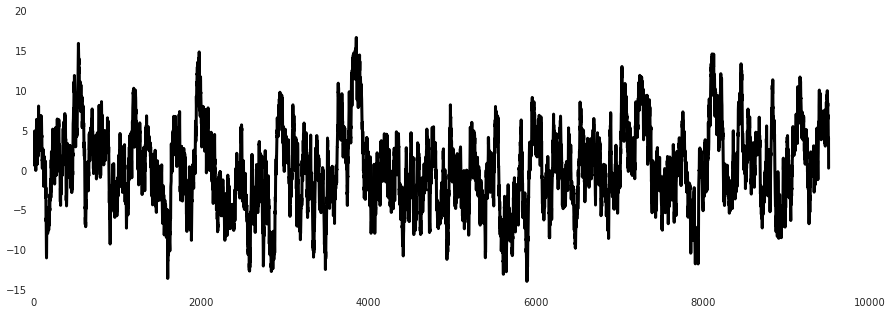

In [22]:
fig = gcf()
fig.set_size_inches((15,5))
plot(mp, 'k', linewidth=3)

In [43]:
iterations = 1000
number_of_ones = np.logspace(0,np.log10(len(mp)),10).astype('int')
avg_correlations = []
for support in number_of_ones:
    correlations = []
    for it in range(iterations):
        random_indices = np.random.choice(np.arange(len(mp)), support, replace=False)
        spikes = np.zeros((len(mp),))
        spikes[random_indices] = 1
        correlations.append(abs(pearsonr(mp, spikes)[0]))
    avg_correlations.append(np.mean(correlations))
    

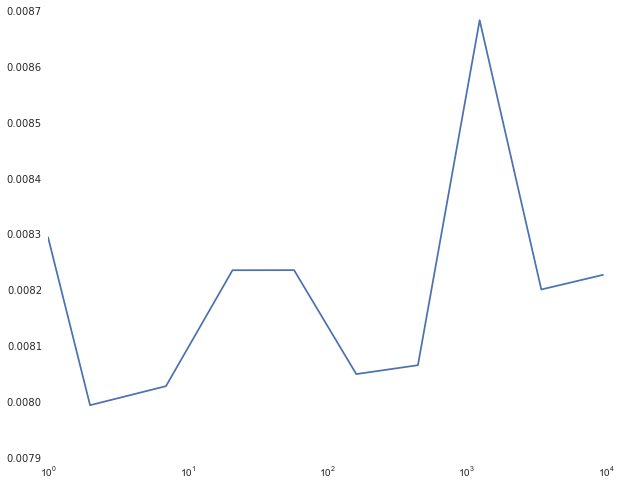

In [44]:
plot(number_of_ones, avg_correlations)
xscale('log')